In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1bf82b0e990>)

In [4]:
!pip install pandas 

In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv('medical.csv')


In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
!pip install plotly matplotlib seaborn --quiet

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [13]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

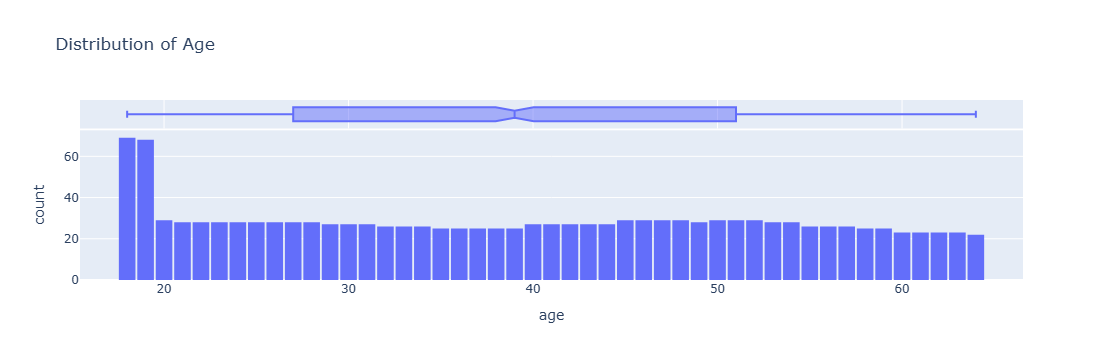

In [14]:
fig = px.histogram(medical_df, 
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()


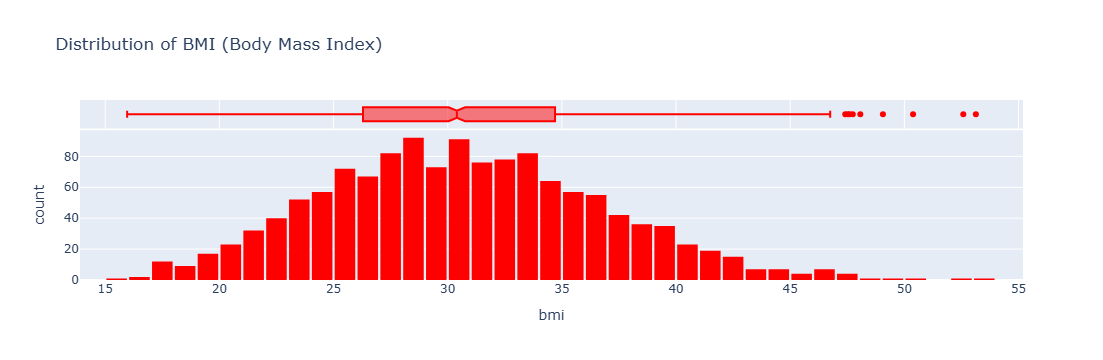

In [15]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.histogram(medical_df, 
                    x='charges',
                   color='smoker',
                   color_discrete_sequence=['pink','gray'],
                   title='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()
                   

In [17]:
fig = px.histogram(medical_df, 
                    x='region',
                   color='sex',
                   color_discrete_sequence=['pink','gray'],
                   title='Annual Medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [18]:
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=7)
fig.show()

In [19]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                title ='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()


In [20]:
px.violin(medical_df, x='children', y='charges')

In [21]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [22]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362878)

In [23]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790469)

In [24]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [25]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984782)

In [26]:
medical_df.select_dtypes(include=['number']).corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlational Matrix')

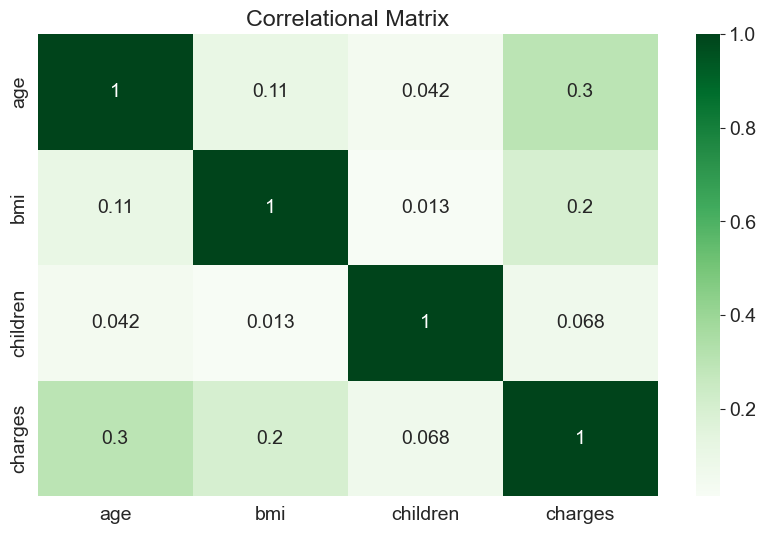

In [27]:
sns.heatmap(medical_df.select_dtypes(include=['number']).corr(), cmap='Greens', annot=True)
plt.title('Correlational Matrix')

In [28]:
def estimate_charges(age, w, b):
    return w * age + b

In [29]:
w=50
b=100


In [30]:
non_smoker_df = medical_df[medical_df.smoker=='no']
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


In [31]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(30, w , b)

In [32]:
estimated_charges

1600

In [33]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [34]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

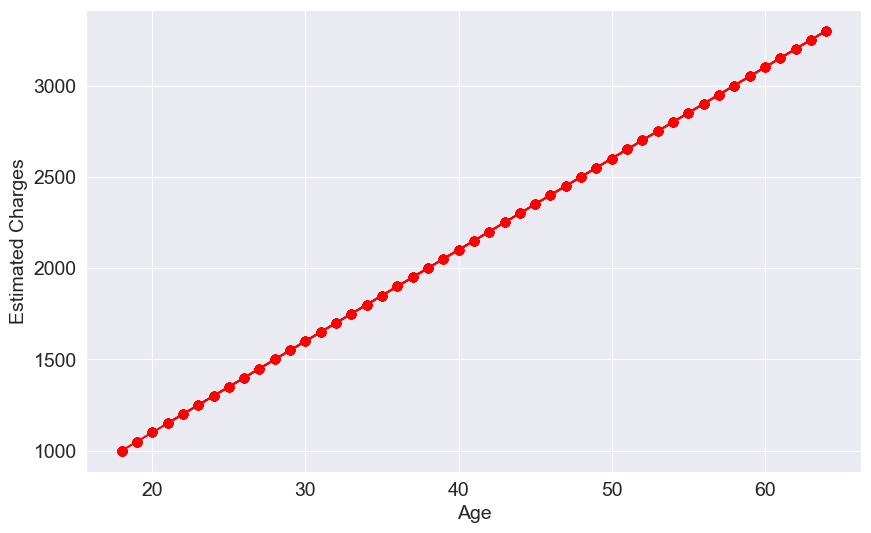

In [35]:
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

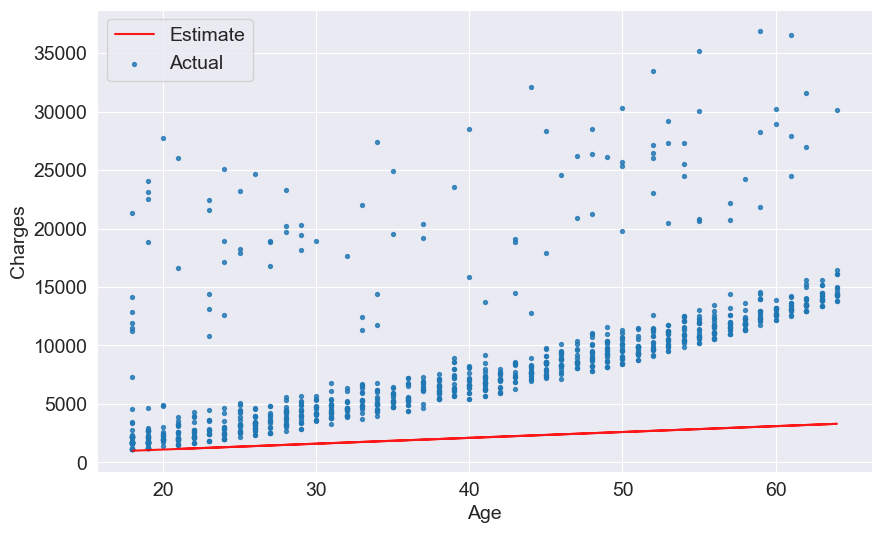

In [36]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r' , alpha=0.9);

plt.scatter(ages, target, s=8, alpha= 0.8);
plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend([ 'Estimate', 'Actual']);

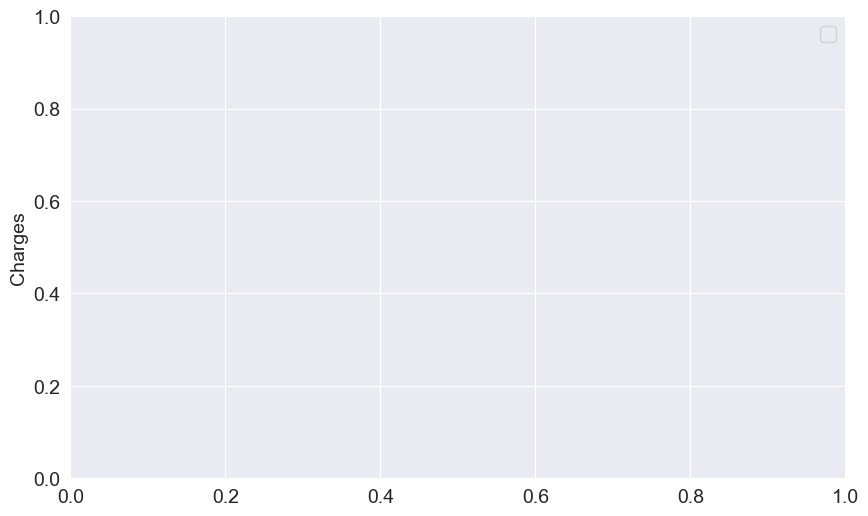

In [37]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend([ 'Estimate', 'Actual']);
    

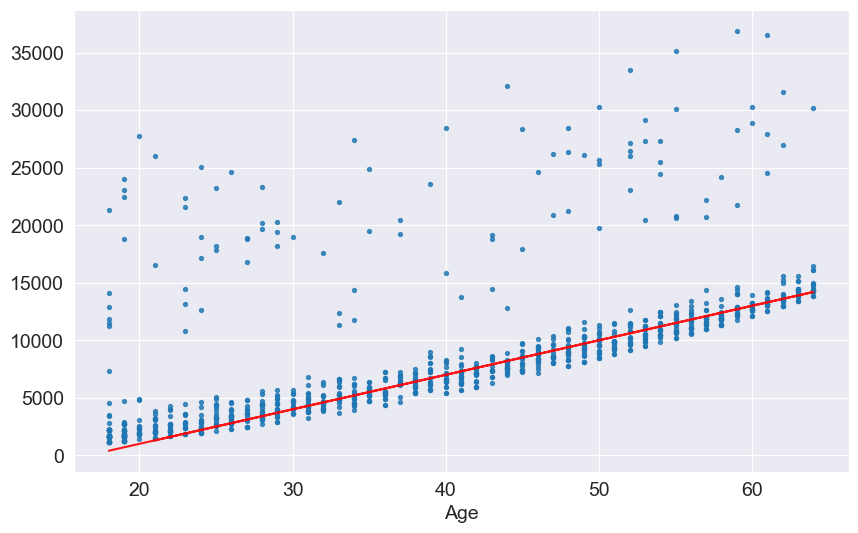

In [38]:
try_parameters(300,-5000)

In [39]:
!pip install numpy 

In [40]:
import numpy as np

In [41]:
targets = non_smoker_df.charges
predictions = estimated_charges

In [42]:
def rmse (targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [43]:
rmse (targets, predictions)

np.float64(8461.949562575493)

RMSE Loss:   8461.949562575493


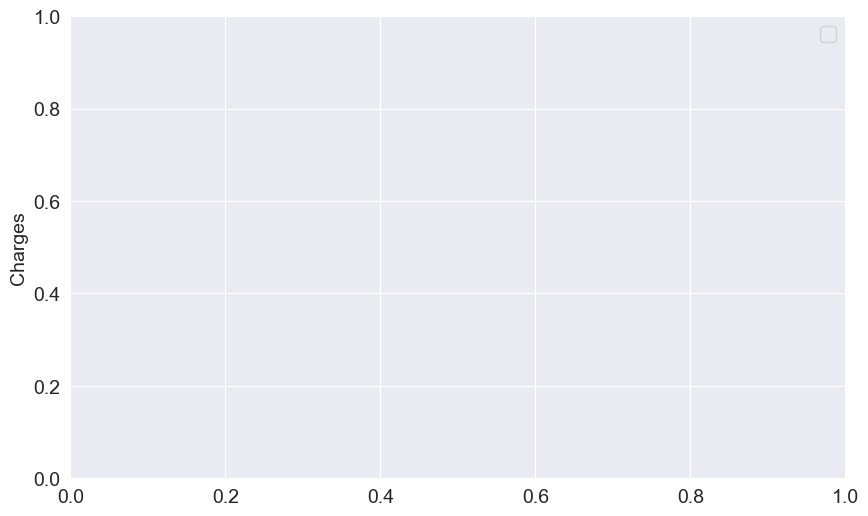

In [44]:
def try_parameters(w,b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages,w,b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
plt.ylabel('Charges')
plt.legend([ 'Estimate', 'Actual']);

loss = rmse(target, predictions)
print("RMSE Loss:  ", loss)

RMSE Loss:   8461.949562575493


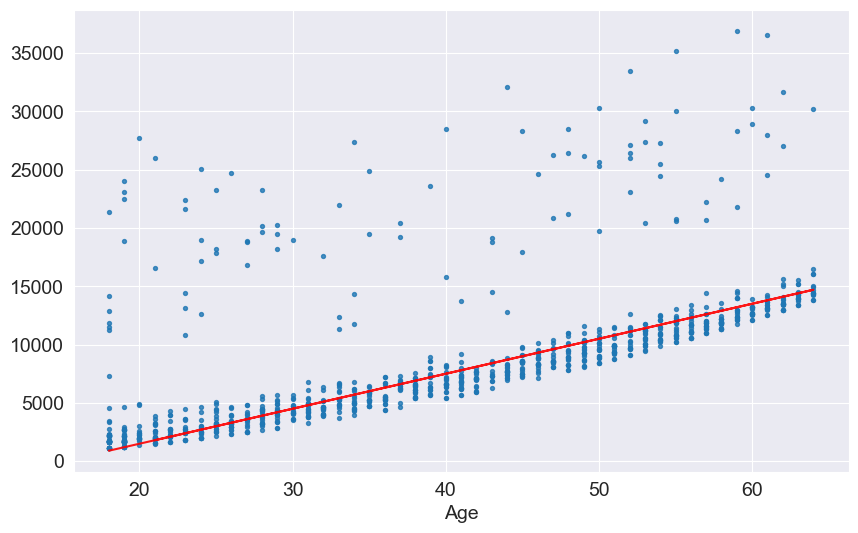

In [45]:
try_parameters(300,-4500)
loss= rmse(target, predictions)
print("RMSE Loss:  ", loss)

In [46]:
!pip install scikit-learn 

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()

In [49]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [50]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape:  (1064,)


In [51]:
model.fit(inputs,targets)

LinearRegression()

In [52]:
model.predict(np.array([[23],[37],[61]]))

C:\Users\janme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [53]:
predictions = model.predict(inputs)

predictions

In [54]:
targets


1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [55]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [56]:
# w
model.coef_

array([267.24891283])

In [57]:
# b 
model.intercept_

np.float64(-2091.4205565650864)

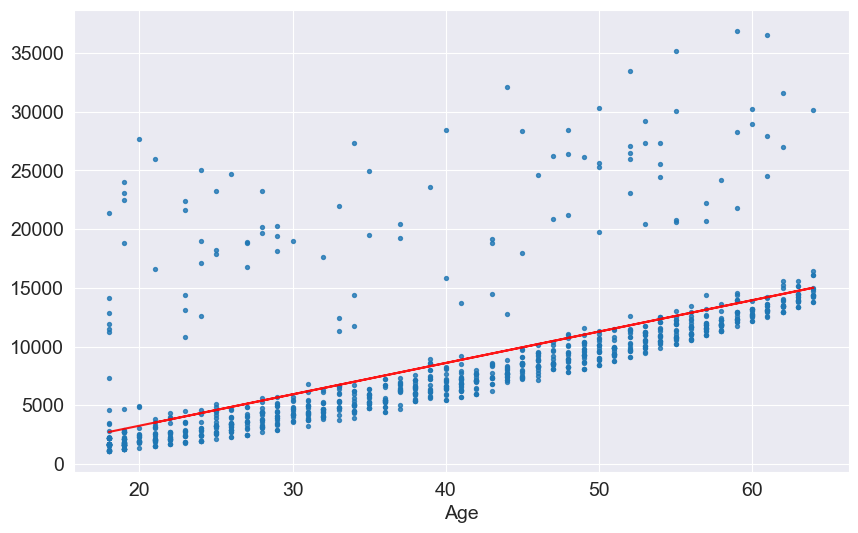

In [58]:
try_parameters(model.coef_, model.intercept_)

In [59]:
from sklearn.linear_model import SGDRegressor

In [60]:
model_2 = SGDRegressor()

In [61]:
help(model_2.fit)

Help on method fit in module sklearn.linear_model._stochastic_gradient:

fit(X, y, coef_init=None, intercept_init=None, sample_weight=None) method of sklearn.linear_model._stochastic_gradient.SGDRegressor instance
    Fit linear model with Stochastic Gradient Descent.

    Parameters
    ----------
    X : {array-like, sparse matrix}, shape (n_samples, n_features)
        Training data.

    y : ndarray of shape (n_samples,)
        Target values.

    coef_init : ndarray of shape (n_features,), default=None
        The initial coefficients to warm-start the optimization.

    intercept_init : ndarray of shape (1,), default=None
        The initial intercept to warm-start the optimization.

    sample_weight : array-like, shape (n_samples,), default=None
        Weights applied to individual samples (1. for unweighted).

    Returns
    -------
    self : object
        Fitted `SGDRegressor` estimator.



In [62]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape : ', inputs.shape)
print('targets.shape: ', targets.shape)

inputs.shape :  (1064, 1)
targets.shape:  (1064,)


In [63]:
model_2.fit(inputs, targets)

SGDRegressor()

In [64]:
predictions_2 = model_2.predict(inputs)

In [65]:
predictions_2

array([2026.53168701, 6155.18065422, 8219.50513782, ..., 2026.53168701,
       2026.53168701, 3265.12637717], shape=(1064,))

In [66]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [67]:
rmse(targets, predictions_2)

np.float64(5639.540502915076)

In [68]:
model_2.coef_

array([412.86489672])

In [69]:
model_2.intercept_

array([-5405.03645397])

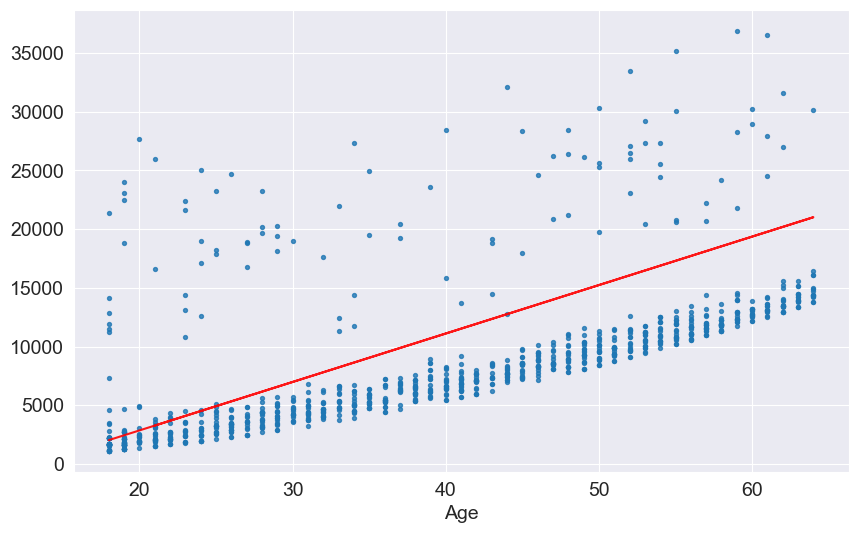

In [70]:
try_parameters(model_2.coef_,model_2.intercept_)

In [71]:
# Linear Regression using Multiple Features

inputs , targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


In [72]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [73]:
try_parameters(model.coef_, model.intercept_)

ValueError: operands could not be broadcast together with shapes (2,) (1064,) 

In [74]:

inputs , targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  4608.470405038247


In [75]:
inputs , targets = medical_df[['age','bmi','children']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  11355.317901125973


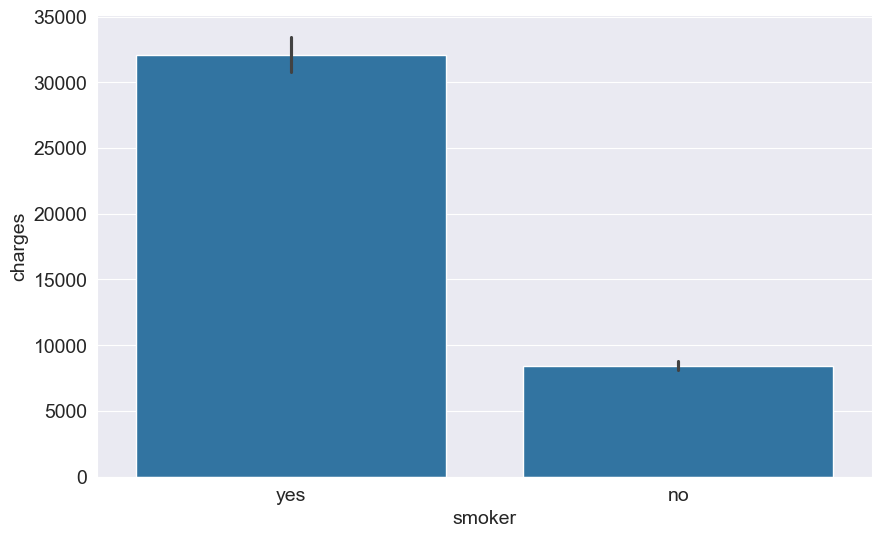

In [76]:
#Using Categoric Features For Machine Learning
sns.barplot(data=medical_df, x='smoker', y='charges');

In [77]:
smoker_codes= {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df


,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [78]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984782)

In [79]:
inputs , targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  6056.439217188081


In [80]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)

In [81]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [82]:
inputs , targets = medical_df[['age','bmi','children','smoker_code','sex_code']], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  6056.100708754546


<Axes: xlabel='region', ylabel='charges'>

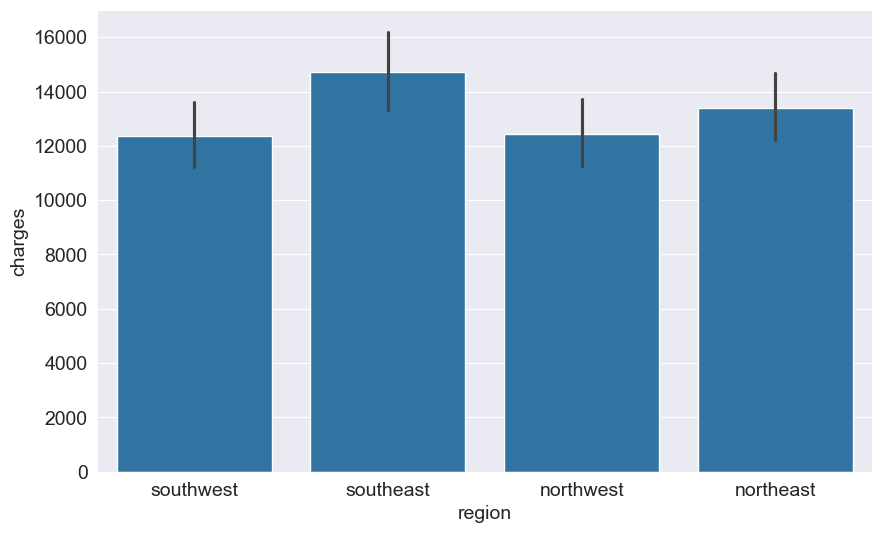

In [83]:
#One_hot Coding
sns.barplot(data= medical_df, x='region', y='charges')

In [84]:
from sklearn import preprocessing 
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [85]:
enc.transform( [['northeast'],
                ['northwest']]).toarray()

C:\Users\janme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [86]:
medical_df[['region']]

,region
0,southwest
1,southeast
2,southeast
3,northwest
4,northwest
...,...
1333,northwest
1334,northeast
1335,southeast
1336,southwest


In [87]:
one_hot = enc.transform(medical_df[['region']]).toarray()

In [88]:
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [89]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [90]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [97]:
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs , targets = medical_df[input_cols], medical_df['charges']
model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)
loss = rmse(targets,predictions)
print('Loss: ', loss)

Loss:  6041.6796511744515


In [98]:
model.predict([[28,30,2,1,0,0,1,0,0]])

C:\Users\janme\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

In [99]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [100]:
model.intercept_

np.float64(-12525.547811195444)

In [102]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [106]:
from sklearn.preprocessing import StandardScaler


In [108]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [110]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [111]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [112]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [113]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [114]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [115]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814
